In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np


In [3]:
channels = pd.read_csv("channel_data.csv")
channels['avgViews'] = channels['View Count'] / channels['Video Count']
channels.replace([np.inf, -np.inf], np.nan, inplace=True)
channels.dropna(inplace=True)
channels

,Title,View Count,Subscriber Count,Video Count,avgViews
0,YouTube TV,16561757,369000,80,2.070220e+05
1,Talent Recap,6462549813,13000000,5478,1.179728e+06
2,Love YourSelf,475384601,1560000,1817,2.616316e+05
3,Real Engineering,461006113,4210000,185,2.491925e+06
4,Leo - Topic,35957,143,3,1.198567e+04
...,...,...,...,...,...
207,McCormick Spice,123137442,136000,359,3.430012e+05
208,Queen Radio,1260445,20700,186,6.776586e+03
209,sabtuahad,3638039,3280,76,4.786893e+04
210,Hollywood Action,56588925,208000,23,2.460388e+06


# Is Average Viewership Proportional to Subscriber Count?

Does the number of subscribers a channel has influence its average viewership? In this analysis, we aim to answer that question so that content creators can determine whether growing their subscriber base is a worthwhile endeavor for increasing average viewership, and subsequently profit. To do this, we will use a scatterplot for data visualization, along with linear regression to visualize possible correlation. We will also use a Pearson test to see if our results are statistically significant.

,Title,View Count,Subscriber Count,Video Count,avgViews
120,Chill Hop Beats - Topic,22525,32,4517,4.986717e+00
123,ASMR Art of Sound - Topic,16730,69,964,1.735477e+01
130,Jermie,177,14,7,2.528571e+01
166,Church Extension Plan,2673,17,50,5.346000e+01
99,Garwood Borough,8621,149,114,7.562281e+01
...,...,...,...,...,...
76,Gaby Music,58356268,71400,1,5.835627e+07
18,Sia,14052258533,23100000,218,6.445990e+07
12,YoungBoy Never Broke Again,14232130537,13200000,175,8.132646e+07
149,Vlad and Niki,84981824647,110000000,656,1.295455e+08


'Correlation Coefficient: 0.18075365530682858'

'p-value: 0.008654830153107617'

'Largest # of Subs: 40    MrBeast\nName: Title, dtype: object'

'Largest # of Views/Video: 30    Kanye West\nName: Title, dtype: object'

Text(42.12500000000001, 0.5, 'Average Views per Video')

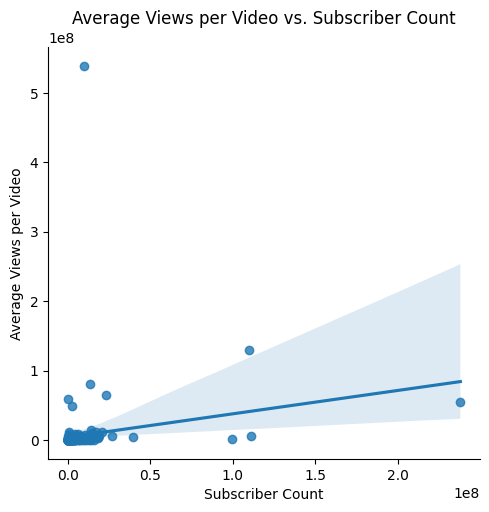

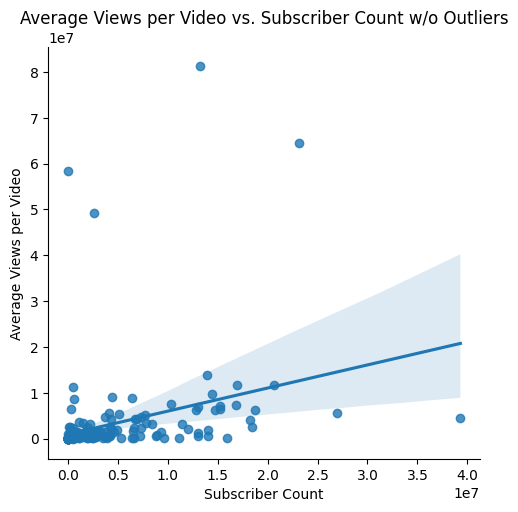

In [48]:

sns.lmplot(data=channels, x='Subscriber Count', y='avgViews')
plt.title("Average Views per Video vs. Subscriber Count")
plt.xlabel("Subscriber Count")
plt.ylabel("Average Views per Video")
channels.sort_values(by='avgViews', inplace=True)
display(channels)

result = stats.pearsonr(x=channels['Subscriber Count'], y=channels['avgViews'])
display(f"Correlation Coefficient: {result.statistic}")
display(f"p-value: {result.pvalue}")
display(f"Largest # of Subs: {channels[channels['Subscriber Count'] == channels['Subscriber Count'].max()].Title}")
display(f"Largest # of Views/Video: {channels[channels['avgViews'] == channels['avgViews'].max()].Title}")

The plot above shows that there is a positive correlation between average viewership and subscriber count. This makes sense because the more subscribers a channel has, the more people will be regularly consuming their content, and as a result their average views per video will increase. The p-value obtained by our Pearson test further supports this idea, allowing us to reject the null hypothesis. However, notice the channels with a low subscriber amount that have an enormous amount of views per video. These outliers are popular musicians, who unlike content creators have a small amount of videos. Each music video they post tends to go viral, and so their views per video are very high.

# Are larger YouTubers better than small YouTubers at getting views?

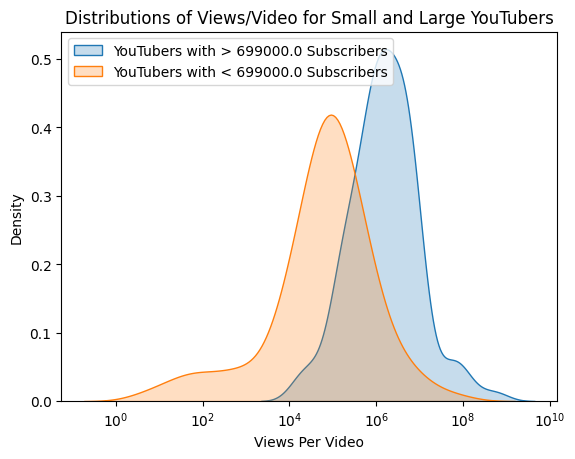

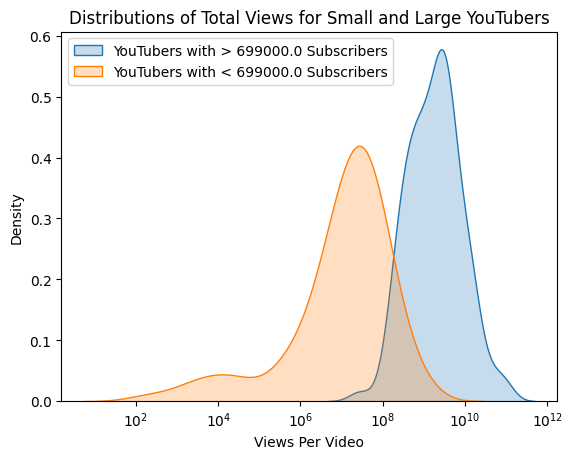

'T-test p-value: 0.06031670869392913'

'Median Views/Video for Small Creators: 78638.1170212766'

'Median Views/Video for Large Creators: 1474925.54845815'

In [52]:
cutoff = channels['Subscriber Count'].median()
small = channels[channels['Subscriber Count'] < cutoff].reset_index()
large = channels[channels['Subscriber Count'] > cutoff].reset_index()

sns.kdeplot(data=large, x='avgViews',log_scale=True, fill=True)
sns.kdeplot(data=small, x='avgViews',log_scale=True, fill=True)
plt.title("Distributions of Views/Video for Small and Large YouTubers")
plt.xlabel("Views Per Video")
plt.legend(labels=[f'YouTubers with > {cutoff} Subscribers',f'YouTubers with < {cutoff} Subscribers'], loc='upper left')
plt.show()

# Plot of distributions of Total Views for Small and Large Creators
# sns.kdeplot(data=large, x='View Count',log_scale=True, fill=True)
# sns.kdeplot(data=small, x='View Count',log_scale=True, fill=True)
# plt.title("Distributions of Total Views for Small and Large YouTubers")
# plt.xlabel("Views Per Video")
# plt.legend(labels=[f'YouTubers with > {cutoff} Subscribers',f'YouTubers with < {cutoff} Subscribers'], loc='upper left')
# plt.show()

result = stats.ttest_ind(large['avgViews'],small['avgViews'])
display(f"T-test p-value: {result.pvalue}")
display(f"Median Views/Video for Small Creators: {small['avgViews'].median()}")
display(f"Median Views/Video for Large Creators: {large['avgViews'].median()}")


The plots above show that there is a difference in the distributions of views per video for small and large creators. This, combined with the large difference in the median views per video for the two populations supports the claim that there is a significant difference in the average viewership of large creators and the average viewership of small creators. This is claim is further supported by a small p-value of 0.06, which though not technically statistically significant helps lend further credibility to the claim that large creators get more views per video than small creators.

# Subscribers vs. Video Count

Is the number of subscribers to a YouTube channel proportional to the number of videos that channel has uploaded? If the two are strongly correlated, then a good strategy to grow a YouTube channel would be to churn out a large quantity of videos. If they are weakly correlated or not correlated, it may not be so important for creators to be putting out a large quantity of videos. Determining whether subscriber count is correlated to total number of videos uploaded can help content creators to formulate a strategy to maximize their channel growth. 

'Corellation coefficient: 0.08899168735733873'

'p-value: 0.19897940975506395'

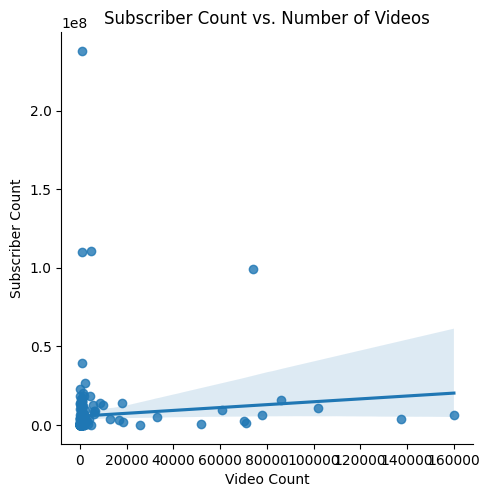

In [51]:
sns.lmplot(data=channels, x="Video Count", y="Subscriber Count")
plt.title("Subscriber Count vs. Number of Videos")
result = stats.pearsonr(x=channels['Video Count'], y=channels["Subscriber Count"])

display(f"Corellation coefficient: {result.statistic}")
display(f"p-value: {result.pvalue}")


The plot above shows that there may be a weak correlation between the total number of videos a channel puts out and its subscriber count. The p-value obtained by a pearson test is 0.19, which says that this result is not statistically significant. This tells us that having more videos does not necessarily correspond to having more subscribers, and as such quantity of videos is not a reliable way to grow a YouTube channel

# YouTube Channel Analysis


## Analysis Objective
This expanded analysis aims to provide a deeper understanding of the engagement and efficiency of the top YouTube channels by examining their views-to-subscriber ratio, visualizing the distribution of this ratio, identifying the top performers, and exploring the relationship between subscribers and views.
    

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# df = pd.read_csv('./youtube_channels_stats.csv')
df = pd.read_csv('./channel_data.csv')

# Calculate the Views per Subscriber Ratio
df['Views_per_Subscriber'] = df['View Count'] / df['Subscriber Count']
df_sorted = df.sort_values(by='Views_per_Subscriber', ascending=False)

df_sorted.head()


,Title,View Count,Subscriber Count,Video Count,Views_per_Subscriber
198,Pie Insurance,4800216,479,35,10021.327766
39,Grainger,69841775,16000,701,4365.110937
100,MSNBC,12050180260,6450000,77983,1868.245002
144,Comedy Bites,808866242,507000,1327,1595.396927
119,McCormick Corporate,12462799,7840,57,1589.642730


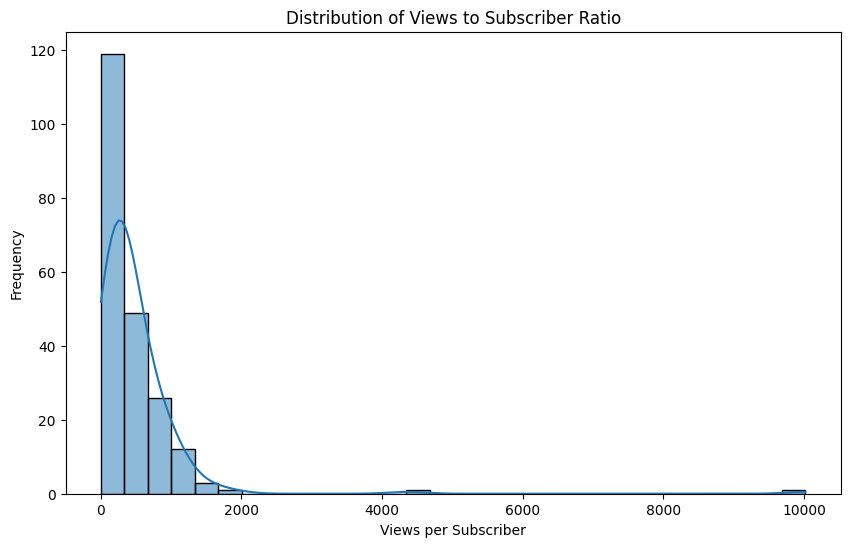

In [8]:

# Plotting the distribution of views-to-subscriber ratios
plt.figure(figsize=(10, 6))
sns.histplot(df['Views_per_Subscriber'], bins=30, kde=True)
plt.title('Distribution of Views to Subscriber Ratio')
plt.xlabel('Views per Subscriber')
plt.ylabel('Frequency')
plt.show()


In [9]:

# Displaying the top 10 channels by Views per Subscriber Ratio
top_10 = df_sorted.head(10)
top_10


,Title,View Count,Subscriber Count,Video Count,Views_per_Subscriber
198,Pie Insurance,4800216,479,35,10021.327766
39,Grainger,69841775,16000,701,4365.110937
100,MSNBC,12050180260,6450000,77983,1868.245002
144,Comedy Bites,808866242,507000,1327,1595.396927
119,McCormick Corporate,12462799,7840,57,1589.642730
35,Fox News,16126544384,11100000,101826,1452.841836
145,Fox Business,3053805886,2390000,70236,1277.743049
13,HARDY,652164090,555000,58,1175.070432
26,Paramount Plus,1316880753,1170000,71111,1125.539105
209,sabtuahad,3638039,3280,76,1109.158232


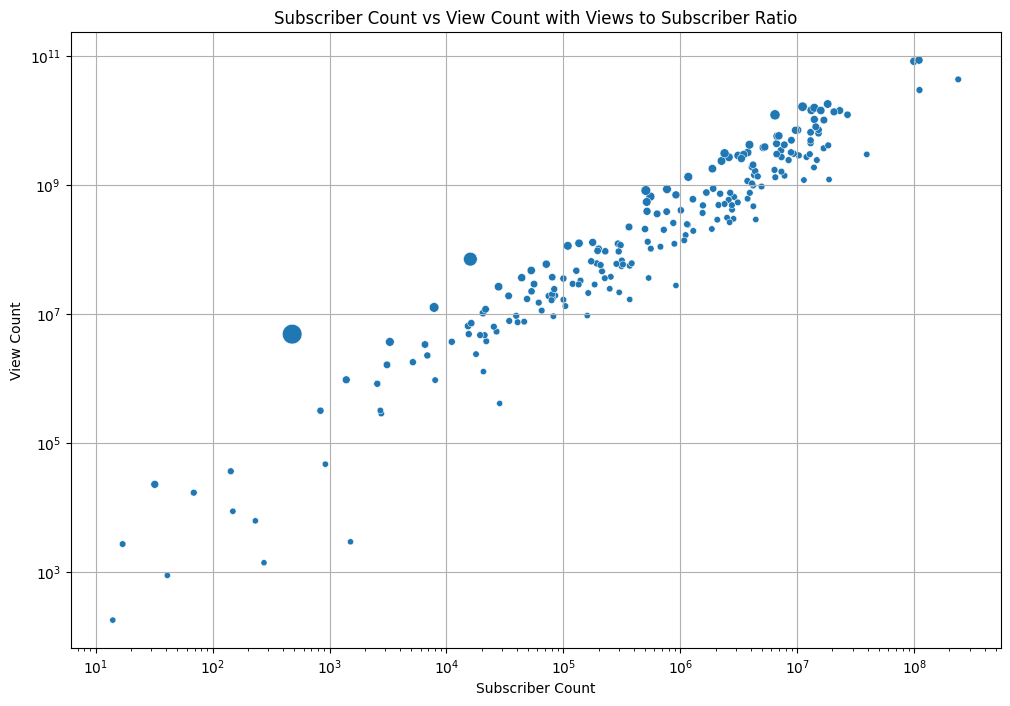

In [10]:

# Scatter plot of Subscriber Count vs View Count
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Subscriber Count', y='View Count', size='Views_per_Subscriber', legend=False, sizes=(20, 200))
plt.title('Subscriber Count vs View Count with Views to Subscriber Ratio')
plt.xlabel('Subscriber Count')
plt.ylabel('View Count')
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()



## Conclusion
This extended analysis of YouTube channels reveals significant insights into viewer engagement and content efficiency. By examining the views-to-subscriber ratio, we identify channels with highly engaged audiences. The histogram of the ratio distribution highlights the variance in engagement across channels, while the top 10 channels by this metric showcase those with exceptional performance. Furthermore, the scatter plot reveals the relationship between subscriber count and view count, underlining the diversity in strategies for achieving YouTube success. Overall, the analysis underscores the importance of creating content that resonates with and actively engages viewers.
